In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!pip install -q fastai

In [ ]:
from fastprogress.fastprogress import master_bar, progress_bar
from fastai.vision.all import *

In [ ]:
import kagglehub
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.


In [ ]:
from pathlib import Path

data_path = Path(path) / "chest_xray"

In [ ]:
dls = ImageDataLoaders.from_folder(data_path,
    train='train',
    valid='val',
    item_tfms=Resize(224),
    bs=32
)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=[accuracy, Precision(), Recall()])

learn.remove_cb(ProgressCallback)   # <-- removes the thing crashing
learn.fine_tune(5)


[0, 0.3323366641998291, 0.8616573214530945, 0.6875, 0.6363636363636364, 0.875, '02:07']
[0, 0.1441335380077362, 0.24660253524780273, 0.875, 0.875, 0.875, '01:56']
[1, 0.08221161365509033, 0.20938439667224884, 0.875, 0.8, 1.0, '01:47']
[2, 0.057685449719429016, 0.1520846039056778, 0.9375, 0.8888888888888888, 1.0, '01:47']
[3, 0.029674077406525612, 0.062051817774772644, 1.0, 1.0, 1.0, '01:53']
[4, 0.024011462926864624, 0.11015724390745163, 0.875, 0.8, 1.0, '01:48']


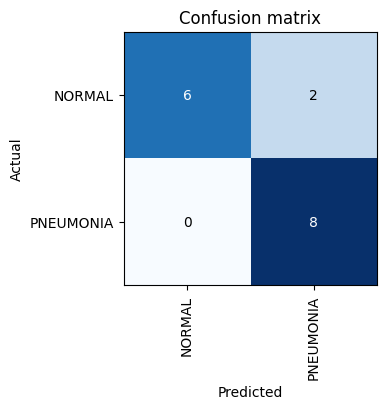

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4))


<Figure size 2800x2000 with 0 Axes>

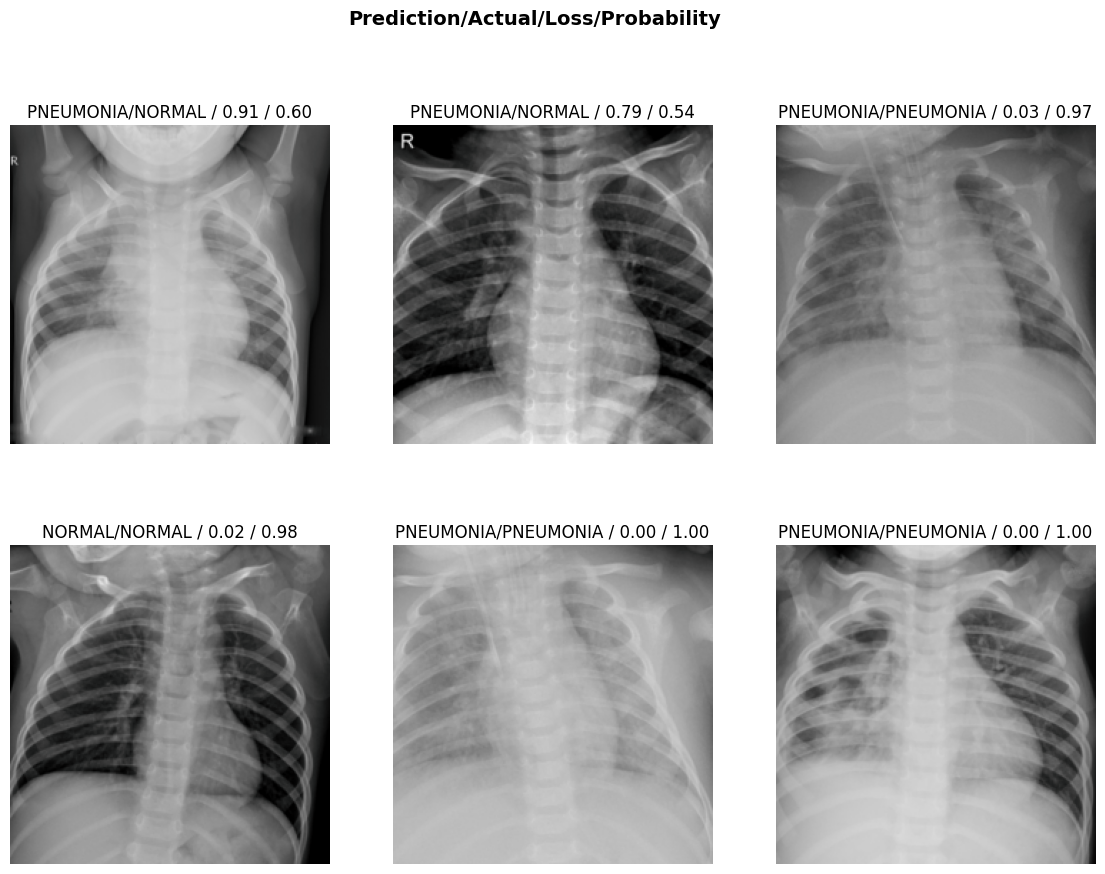

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10), dpi=200)
interp.plot_top_losses(6, figsize=(14,10))